## Custom plotting Bilby results


This notebook plots the results from the Bilby sampler

In [38]:
import json
path = "../data/nested_sampling/testrun2_result.json"

# Opening JSON file
f = open(path)
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [49]:
import pandas as pd

df = pd.DataFrame(data["samples"]["content"])#.to_numpy() #posterior
df2 = pd.DataFrame(data["posterior"]["content"])#.to_numpy() #posterior

y = df.to_numpy()
df.columns
y.shape

(2677, 8)

In [51]:
df2.columns


Index(['omega_gw', 'phi0_gw', 'psi_gw', 'iota_gw', 'delta_gw', 'alpha_gw', 'h',
       'sigma_p', 'f00', 'fdot0', 'distance0', 'gamma0', 'sigma_m',
       'log_likelihood', 'log_prior'],
      dtype='object')

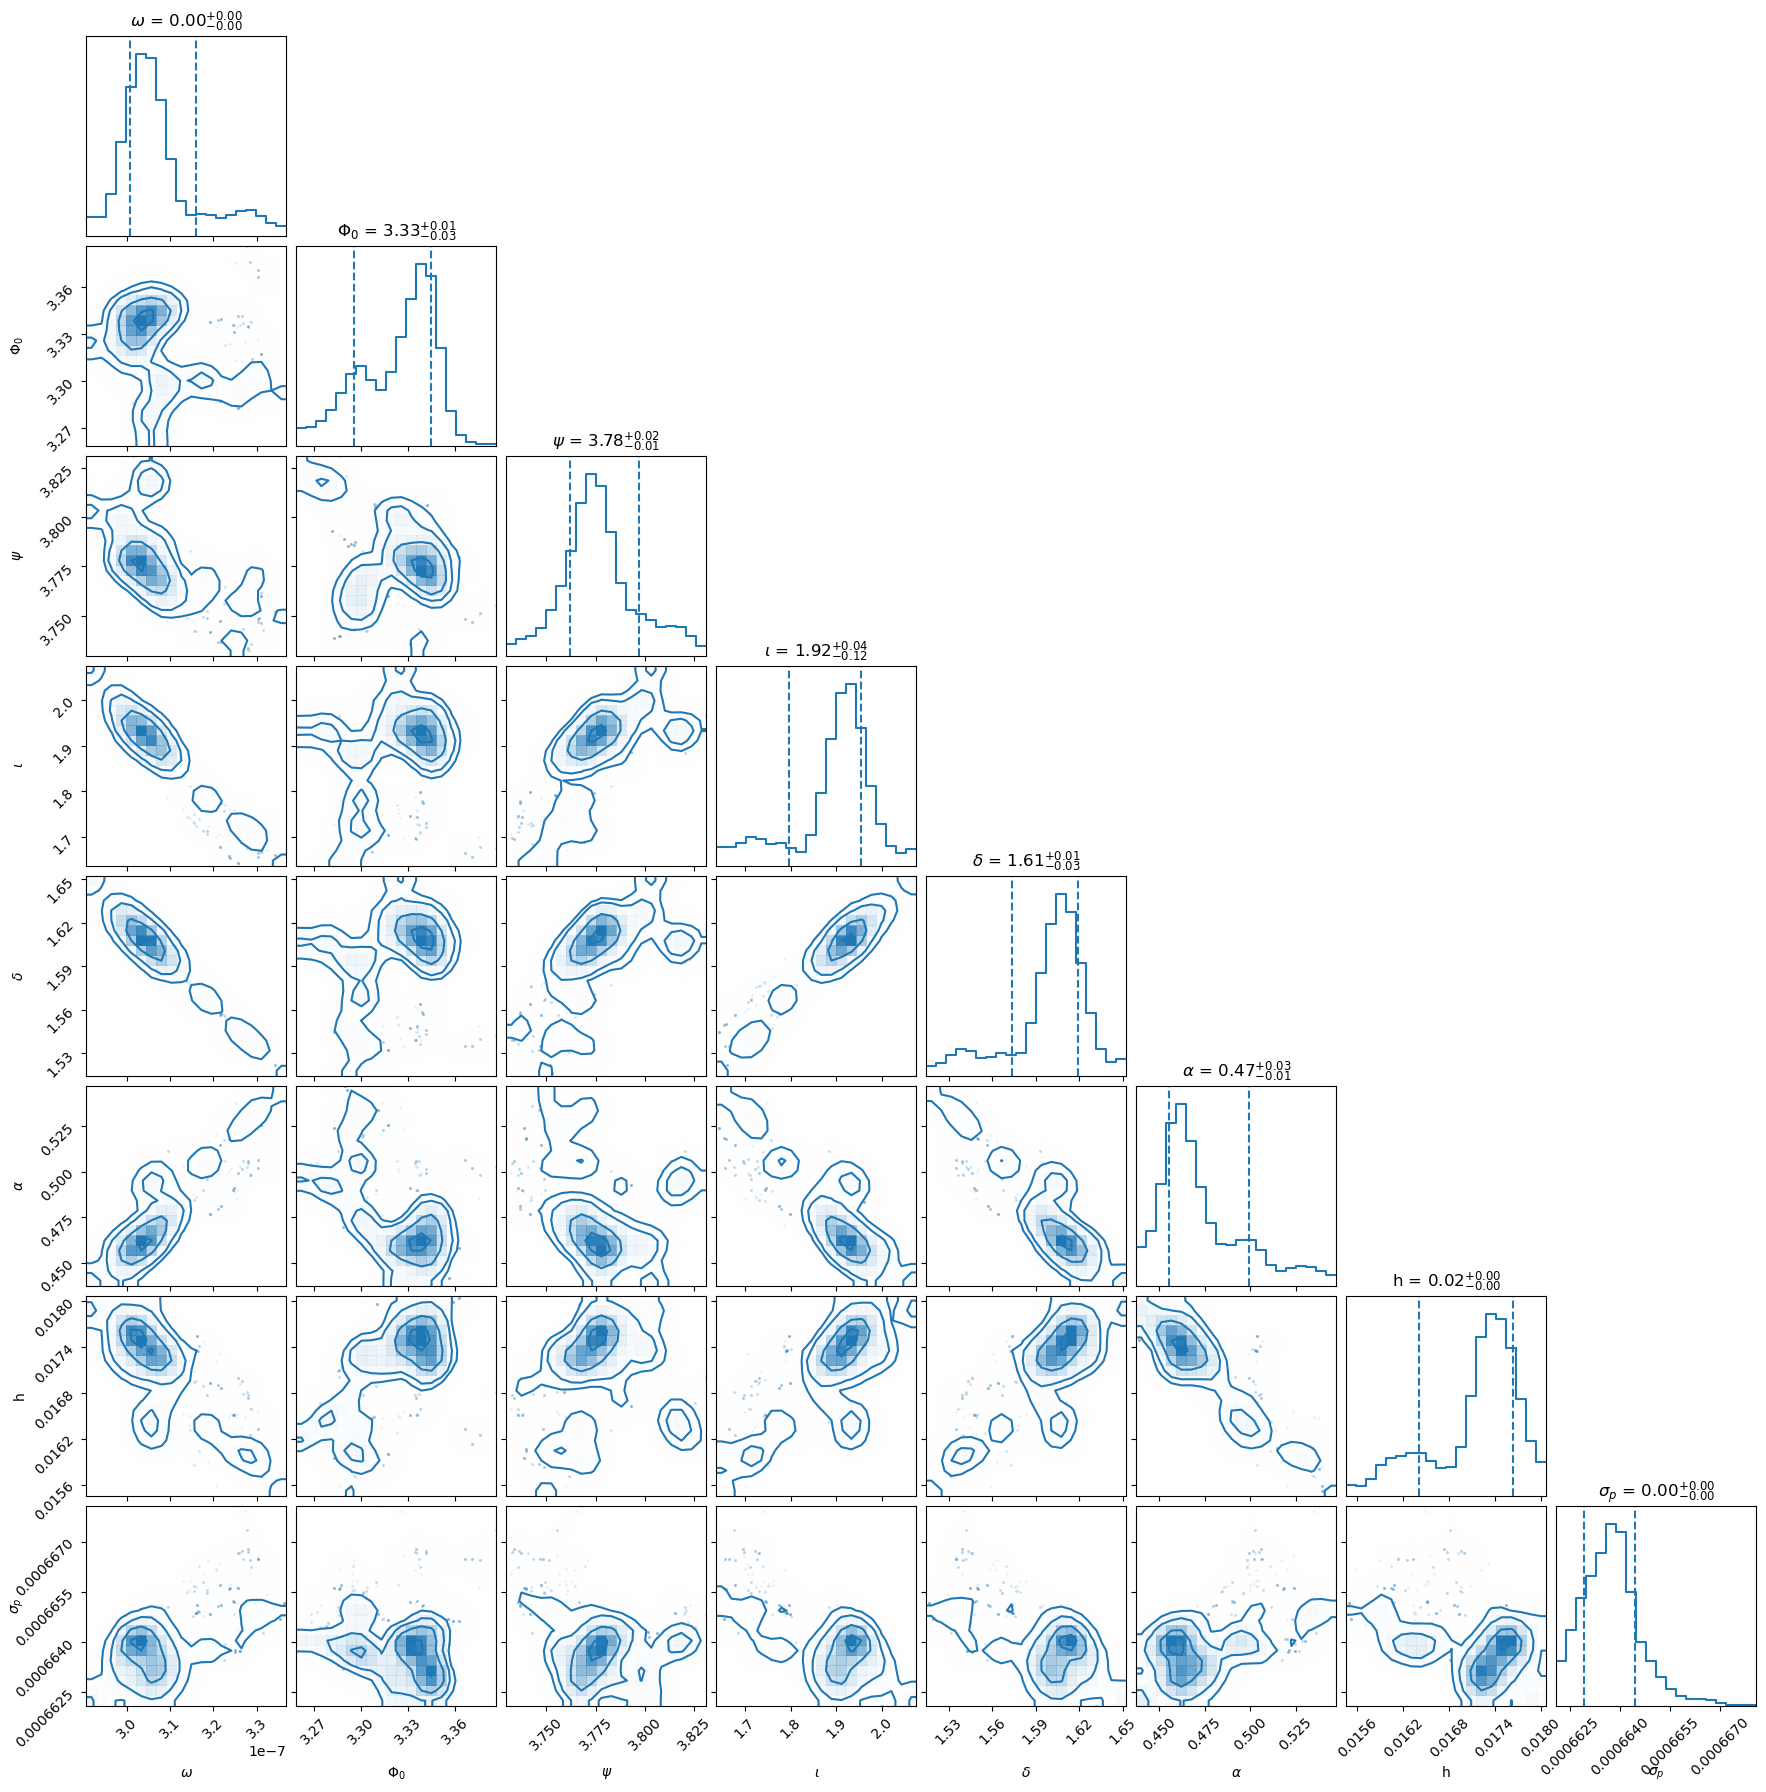

In [69]:
import matplotlib.pyplot as plt 
labels = [r'$\omega$', r'$\Phi_0$', r'$\psi$', r'$\iota$', r'$\delta$', r'$\alpha$', 'h',
       r'$\sigma_p$']

truths = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2,1e-8]


truths = [3.33,3.33,3.33,3.33,3.33,3.33,3.33,3.33]
axes_scale = ["log", "linear","linear","linear","linear","linear","linear","linear"]

fig = corner.corner(y,color='C0',show_titles=True,smooth=True, smooth1d=True,labels=labels,truth_color='C1',quantiles=[0.16, 0.84])


#corner.overplot_lines(fig, truths, color="C1")


plt.savefig("../data/plots/example_corner_plot.png",dpi=300, bbox_inches = "tight")




#fig = corner.corner(y,truths=truths)


In [3]:
samples = result.posterior.to_numpy()[:, :7].copy()


samples[:, 0:7] = np.log10(samples[:, 0:7])

labels = ['$log_{10} \\gamma_{\\Omega}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{Q}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{S}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{\\eta}$  $[\\rm{s^{-1}}]$',
                  '$log_{10} \\sigma_{Q}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{S}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{\\eta}$  $[\\rm{s^{-1/2}}]$']

fig = corner(samples, truths=[np.log10(gamma_omega), np.log10(gamma_Q), np.log10(gamma_S), np.log10(gamma_eta), np.log10(sigma_Q), np.log10(sigma_S), np.log10(sigma_eta)],
                     range = [(-14, -8), (-8, -5), (-8, -5), (-8, -5), (-8, -3), (-8, -3), (-8, -3)],
                     color='b', smooth=True, smooth1d=True, levels=[1-np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9/2)])

axarr = np.reshape(fig.axes, (len(labels), len(labels)))
for ii, label in enumerate(labels):
            axarr[ii,ii].set_title(label, fontsize=18)
            axarr[ii,0].yaxis.set_tick_params(labelsize=15)


            
for ax in axarr[-1, :]:
            ax.xaxis.set_tick_params(labelsize=14)

{'mass_1': 36.0,
 'mass_2': 29.0,
 'a_1': 0.4,
 'a_2': 0.3,
 'tilt_1': 0.5,
 'tilt_2': 1.0,
 'phi_12': 1.7,
 'phi_jl': 0.3,
 'luminosity_distance': 2000.0,
 'theta_jn': 0.4,
 'psi': 2.659,
 'phase': 1.3,
 'geocent_time': 1126259642.413,
 'ra': 1.375,
 'dec': -1.2108}

In [14]:
import numpy as np
import corner 
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])

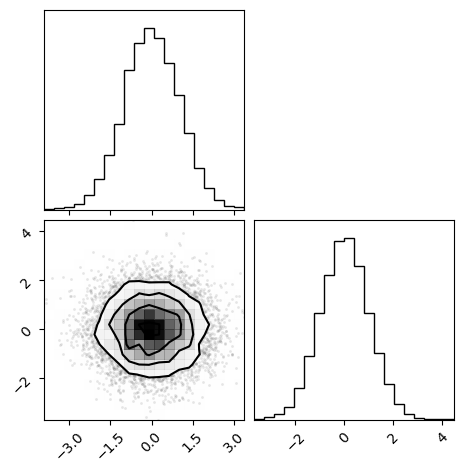

In [31]:
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(samples)

In [45]:

labels = ['$log_{10} \\gamma_{\\Omega}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{Q}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{S}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{\\eta}$  $[\\rm{s^{-1}}]$',
                  '$log_{10} \\sigma_{Q}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{S}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{\\eta}$  $[\\rm{s^{-1/2}}]$']


for ii, label in enumerate(labels):
            print(ii, label)

0 $log_{10} \gamma_{\Omega}$ $[\rm{s^{-1}}]$
1 $log_{10} \gamma_{Q}$ $[\rm{s^{-1}}]$
2 $log_{10} \gamma_{S}$ $[\rm{s^{-1}}]$
3 $log_{10} \gamma_{\eta}$  $[\rm{s^{-1}}]$
4 $log_{10} \sigma_{Q}$  $[\rm{s^{-1/2}}]$
5 $log_{10} \sigma_{S}$  $[\rm{s^{-1/2}}]$
6 $log_{10} \sigma_{\eta}$  $[\rm{s^{-1/2}}]$


In [32]:
samples

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       ...,
       [ 0.95259051,  0.38782734],
       [ 1.37736658,  0.37835397],
       [ 1.71352973, -1.6199198 ]])

In [33]:
samples.shape

(10000, 2)

In [ ]:
injection_parameters = dict(
    omega_gw=5e-7,
    phi0_gw=0.20,
    psi_gw=2.50,
    iota_gw=1.0,
    delta_gw=1.0,
    alpha_gw=1.0,
    h=1e-2,
    f0=327.8470205611185,
    fdot=-1.227834e-15,
    distance=181816860005.41092,
    gamma=1e-13,
    sigma_p=1e-8,
    sigma_m=1e-08
)

samples = result.samples
labels = result.parameter_labels
fig = corner.corner(samples, labels=labels)
plt.show()
plt.close()